In [317]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [318]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [319]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [320]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import csv
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [321]:
# read csv with facilities and air pollutants in CA county
aggregated=pd.read_csv('aggregated_vista_ca_by_county_emseic_merged - aggregated_vista_ca_by_county_emseic_merged.csv')
aggregated.head()

,Unnamed: 0,Closest_County_Centroid,Composting Sites,Compressed Natural Gas Fueling Station,Dairy,Digester,Feed Lot,Landfill,Liquefied Natural Gas Fueling Station,Natural Gas Processing Plants,...,Centroid_Longitude,TOG,ROG,COT,NOX,SOX,PM,PM10,PM2_5,Total Facilities
0,0,ALAMEDA,6,0,0,0,0,42,3,0,...,-121.912488,134.840060,52.964215,218.327664,70.393760,2.1303,29.412402,18.091634,8.204909,231
1,1,AMADOR,1,0,0,0,0,0,0,0,...,-120.653856,10.252184,5.091711,19.055692,4.357744,0.1249,8.725638,5.396293,2.941648,4
2,2,BUTTE,5,0,3,1,0,1,0,0,...,-121.601919,23.291007,14.396062,69.518978,18.730721,0.2657,31.816585,17.991954,5.661389,261
3,3,CALAVERAS,1,0,0,0,0,0,0,0,...,-120.561442,11.288079,5.075024,21.024100,2.769050,0.0387,5.729100,3.691200,1.326400,7
4,4,COLUSA,2,0,1,0,0,0,0,0,...,-122.237563,14.777140,6.412037,20.365611,11.158445,0.3754,25.530000,12.832200,2.935700,901


In [322]:
#drop unnecessary columns and rename
aggregated=aggregated.drop(columns=['Unnamed: 0']).rename(columns={'Closest_County_Centroid':'County'})
aggregated.head()

,County,Composting Sites,Compressed Natural Gas Fueling Station,Dairy,Digester,Feed Lot,Landfill,Liquefied Natural Gas Fueling Station,Natural Gas Processing Plants,Natural Gas Station,...,Centroid_Longitude,TOG,ROG,COT,NOX,SOX,PM,PM10,PM2_5,Total Facilities
0,ALAMEDA,6,0,0,0,0,42,3,0,35,...,-121.912488,134.840060,52.964215,218.327664,70.393760,2.1303,29.412402,18.091634,8.204909,231
1,AMADOR,1,0,0,0,0,0,0,0,1,...,-120.653856,10.252184,5.091711,19.055692,4.357744,0.1249,8.725638,5.396293,2.941648,4
2,BUTTE,5,0,3,1,0,1,0,0,9,...,-121.601919,23.291007,14.396062,69.518978,18.730721,0.2657,31.816585,17.991954,5.661389,261
3,CALAVERAS,1,0,0,0,0,0,0,0,2,...,-120.561442,11.288079,5.075024,21.024100,2.769050,0.0387,5.729100,3.691200,1.326400,7
4,COLUSA,2,0,1,0,0,0,0,0,13,...,-122.237563,14.777140,6.412037,20.365611,11.158445,0.3754,25.530000,12.832200,2.935700,901


In [323]:
# read in Asthma data
asthma_county=pd.read_csv('current-asthma-prevalence-by-county-2015_2018.xlsx - Current prevalence.csv')                          

In [324]:
len(asthma_county)

826

In [325]:
#check why there is so many rows 
asthma_county["COUNTY"].value_counts()

Sacramento         14
Imperial           14
Fresno             14
Placer             14
Madera             14
Amador             14
Contra Costa       14
Modoc              14
Kern               14
Tuolumne           14
San Joaquin        14
Sutter             14
Calaveras          14
Mono               14
Sierra             14
Lassen             14
Plumas             14
Orange             14
San Benito         14
San Diego          14
San Bernardino     14
Riverside          14
Napa               14
San Luis Obispo    14
Nevada             14
Alpine             14
Shasta             14
Humboldt           14
Lake               14
Mariposa           14
San Mateo          14
Santa Cruz         14
Santa Clara        14
Ventura            14
Los Angeles        14
Tulare             14
Mendocino          14
Merced             14
Sonoma             14
Santa Barbara      14
Glenn              14
Kings              14
San Francisco      14
Alameda            14
Yuba               14
Yolo      

In [326]:
#see that prevalence of asthma is a string
print(asthma_county.shape)
print(asthma_county.dtypes)
print(asthma_county.describe())
print(asthma_county.columns.tolist())

(826, 8)
COUNTY                     object
YEARS                      object
STRATA                     object
AGE GROUP                  object
CURRENT PREVALENCE         object
95% CONFIDENCE INTERVAL    object
COUNTIES GROUPED           object
COMMENT                    object
dtype: object
            COUNTY      YEARS      STRATA AGE GROUP CURRENT PREVALENCE  \
count          826        826         826       826                457   
unique          59          2           3         7                124   
top     Sacramento  2017–2018  Age groups  All ages               9.0%   
freq            14        413         472       118                 12   

       95% CONFIDENCE INTERVAL  \
count                      457   
unique                     354   
top                 (3.9–27.9)   
freq                         7   

                                         COUNTIES GROUPED  \
count                                                 238   
unique                                   

In [327]:
#make it a float
asthma_county['CURRENT PREVALENCE']= asthma_county['CURRENT PREVALENCE'].str.rstrip('%').astype('float') / 100.0

In [328]:
asthma_county=asthma_county[asthma_county["AGE GROUP"]=="All ages"]

In [329]:
asthma_county.drop(["95% CONFIDENCE INTERVAL", "YEARS","COMMENT", "AGE GROUP", "STRATA", "COUNTIES GROUPED"], axis=1, inplace=True)


In [330]:
asthma_county.rename(columns = {'COUNTY':'County'}, inplace = True)

In [331]:
asthma_county.rename(columns = {'CURRENT PREVALENCE':'Percent Asthma Prevalence'}, inplace = True)

In [332]:
#pick year
asthma_years_grouped=asthma_county.groupby("County").mean()

In [333]:
asthma_years_grouped=asthma_years_grouped.reset_index()

In [334]:
#check for missing values
asthma_years_grouped.isnull().sum()

County                       0
Percent Asthma Prevalence    0
dtype: int64

In [335]:
asthma_years_grouped['County']=asthma_years_grouped['County'].str.upper()

In [337]:
combined=pd.merge(asthma_years_grouped,aggregated, on='County')

In [339]:
combined.drop(["County", "geometry"], axis=1, inplace=True)


In [340]:
combined.columns.to_list()

['Percent Asthma Prevalence',
 'Composting Sites',
 'Compressed Natural Gas Fueling Station',
 'Dairy',
 'Digester',
 'Feed Lot',
 'Landfill',
 'Liquefied Natural Gas Fueling Station',
 'Natural Gas Processing Plants',
 'Natural Gas Station',
 'Natural Gas Storage Field',
 'Oil and Gas Facility Boundary',
 'Oil and Gas Field Boundary',
 'Oil and Gas Well',
 'Power Plant',
 'Refinery',
 'Wastewater Treatment Plant',
 'ALAND',
 'AWATER',
 'Centroid_Latitude',
 'Centroid_Longitude',
 'TOG',
 'ROG',
 'COT',
 'NOX',
 'SOX',
 'PM',
 'PM10',
 'PM2_5',
 'Total Facilities']

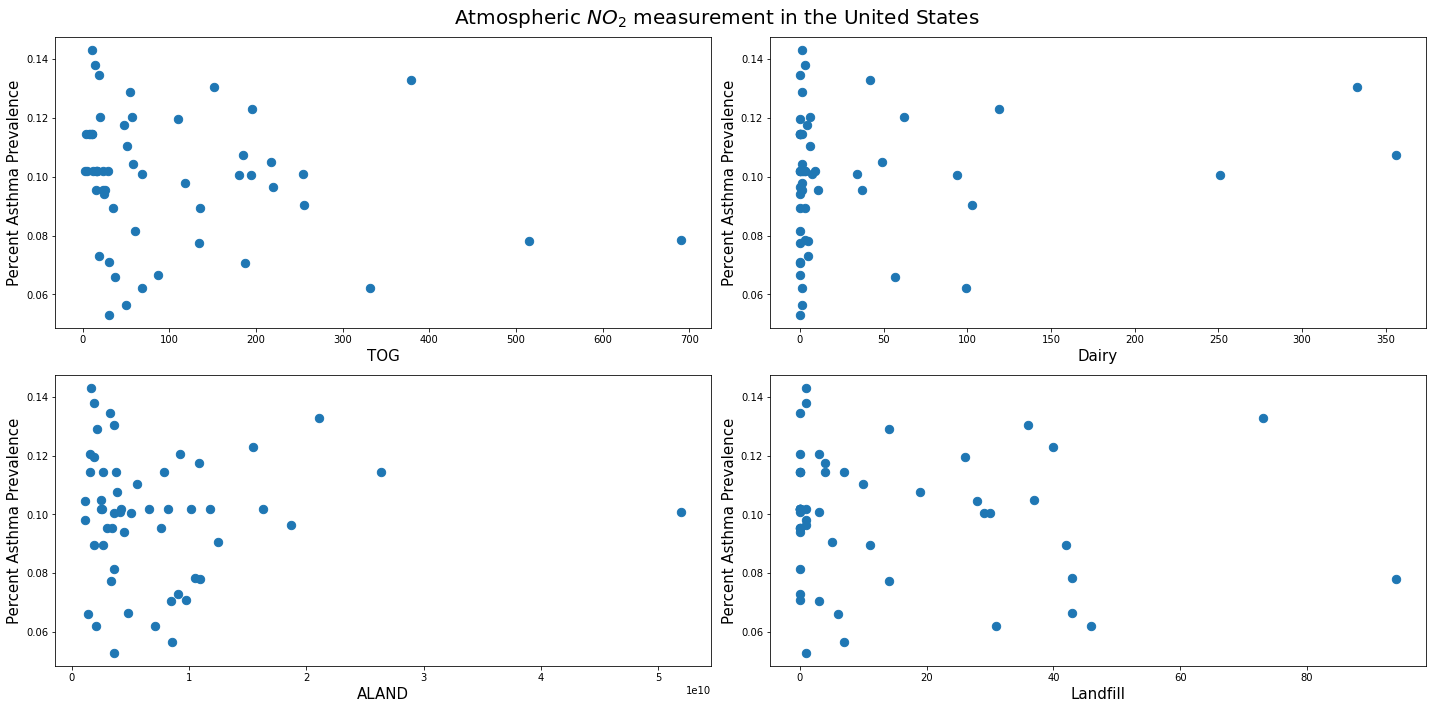

In [350]:
# possible solution
y = combined["Percent Asthma Prevalence"] # y axis variable
ylab = "Percent Asthma Prevalence" # y axis label

msize = 70 # marker size
afsize = 15 # axis font size
tfsize = 20 # title font size

plt.figure(figsize = (20,10))

plt.subplot(221)
plt.scatter(combined['TOG'], y, s = msize)
plt.xlabel("TOG", fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.subplot(222)
plt.scatter(combined['Dairy'], y, s = msize)
plt.xlabel("Dairy", fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.subplot(223)
plt.scatter(combined['ALAND'], y, s = msize)
plt.xlabel("ALAND", fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.subplot(224)
plt.scatter(combined['Landfill'], y, s = msize)
plt.xlabel("Landfill", fontsize = afsize)
plt.ylabel(ylab, fontsize = afsize)

plt.suptitle("Atmospheric $NO_2$ measurement in the United States", fontsize = tfsize)

plt.subplots_adjust(top=0.5)
plt.tight_layout()

In [362]:
# solution
from sklearn.model_selection import train_test_split

X = combined.drop(["Percent Asthma Prevalence"], axis=1)
y = combined["Percent Asthma Prevalence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)

In [363]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(48, 29) (48,) (6, 29) (6,)


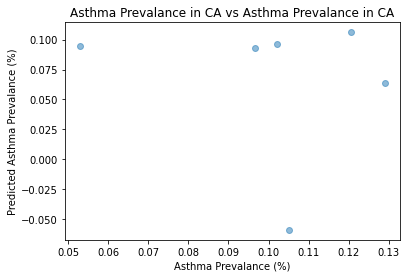

In [364]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train, y_train);

# Predict housing prices on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true prices
plt.scatter(y_test, Y_pred, alpha=0.5)
plt.xlabel("Asthma Prevalance (%)")
plt.ylabel("Predicted Asthma Prevalance (%)")
plt.title("Asthma Prevalance in CA vs Asthma Prevalance in CA");

In [366]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y - predicted_y) **2))

train_error = rmse(y_train, linear_model.predict(X_train))
test_error = rmse(y_test, linear_model.predict(X_test))

print("Training RMSE:", train_error)
print("Test RMSE:", test_error)

Training RMSE: 0.013206958141645075
Test RMSE: 0.07428373951601595


In [371]:
np.random.seed(32)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, y, test_size = 0.10)
linear_model.fit(X_train2, Y_train2);

In [372]:
train_error2 = rmse(Y_train2, linear_model.predict(X_train2)) 
test_error2 = rmse(Y_test2, linear_model.predict(X_test2))

print("Training RMSE:", train_error2)
print("Test RMSE:", test_error2)

Training RMSE: 0.015532429965680725
Test RMSE: 0.0213856707035085


In [373]:
from sklearn.model_selection import KFold

def compute_CV_error(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)
    You should be fitting 4 models total.
    Return the average MSE of these 4 folds.

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        split_Y_train, split_Y_valid = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        # Fit the model on the training split
        model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [375]:
range_of_num_features=range(1, X_train2.shape[1] + 1)
errors = []
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = lm.LinearRegression()
    
    # compute the cross validation error
    error = compute_CV_error(model, X_train2.iloc[:, :N], Y_train2)
    
    print("\tRMSE:", error)
    errors.append(error)

best_num_features = np.argmin(errors) +1
best_err = errors[best_num_features -1]

print(f"Best choice, use the first {best_num_features} features")

Trying first 1 features
	RMSE: 0.02089986952331044
Trying first 2 features
	RMSE: 0.022252520714168864
Trying first 3 features
	RMSE: 0.024357553218090154
Trying first 4 features
	RMSE: 0.028278572829163635
Trying first 5 features
	RMSE: 0.05809188548584534
Trying first 6 features
	RMSE: 0.05791998768458954
Trying first 7 features
	RMSE: 0.06062834473204425
Trying first 8 features
	RMSE: 0.07307481691551457
Trying first 9 features
	RMSE: 0.07347068162369678
Trying first 10 features
	RMSE: 0.07868741651066644
Trying first 11 features
	RMSE: 0.06649604738528926
Trying first 12 features
	RMSE: 0.06631454994498215
Trying first 13 features
	RMSE: 0.07718537352421723
Trying first 14 features
	RMSE: 0.09267435963266088
Trying first 15 features
	RMSE: 0.14907712856985098
Trying first 16 features
	RMSE: 0.1484549792653578
Trying first 17 features
	RMSE: 0.12679974242219966
Trying first 18 features
	RMSE: 0.16619184002386228
Trying first 19 features
	RMSE: 0.22367472141963643
Trying first 20 fea

In [376]:
model= lm.LinearRegression()
model.fit(X_train2.iloc[:, :best_num_features], Y_train2)

# Predict points from our test set and calculate the rmse
train_rmse = rmse(model.predict(X_train2.iloc[:, :best_num_features]), Y_train2) 
test_rmse = rmse(model.predict(X_test2.iloc[:, :best_num_features]), Y_test2)

print("Train RMSE", train_rmse)
print("KFold Validation RMSE", best_err)
print("Test RMSE", test_rmse)

Train RMSE 0.01998708181149686
KFold Validation RMSE 0.02089986952331044
Test RMSE 0.02204165552428844


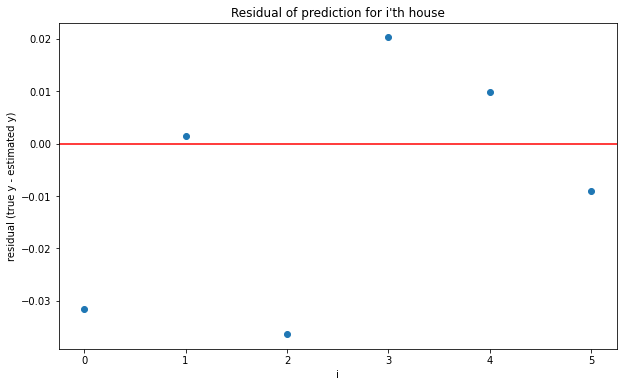

In [377]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(X_test2)), Y_test2 - model.predict(X_test2.iloc[:, :best_num_features]))
plt.xlabel('i')
plt.ylabel('residual (true y - estimated y)')
plt.title("Residual of prediction for i'th house")
plt.axhline(y = 0, color='r');

In [349]:
# solution
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1) #create a Ridge regression object
ridge.fit(X_train, y_train)
ridge_coefficients = ridge.coef_

print(ridge_coefficients)

[-4.41401238e-04 -4.30323466e-03 -2.00431325e-03 -4.63366635e-03
 -2.37217979e-03 -1.30497096e-03  1.15194235e-02  1.08037637e-02
 -2.16963681e-03 -3.70516950e-03 -2.03544102e-03 -1.88353842e-03
 -1.85746496e-03 -3.23131147e-03  1.26075340e-02 -3.12913369e-03
 -4.86442637e-13 -3.30578249e-11  3.50866367e-03  1.93397988e-03
  4.69951603e-06  1.11118131e-04 -3.63899096e-04  5.01307918e-04
 -3.35733792e-04 -3.78051499e-04  5.86905913e-04  2.37340192e-03
  1.85925497e-03]


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02049e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [351]:
# solution
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  3.07371496e-07 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  4.38925135e-14 -2.17815981e-11  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


In [352]:
def calculate_mses(alphas, Model):
    """
    Input:
        alphas (array): contains floats of various alpha values
        Model (sklearn model): the type of sklearn model on which to fit the data
    Output:
        an array of floats containing the mean-squared-errors from the predictions
    """
    mses = []

    for a in alphas:
        model = Model(alpha=a)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mses.append(mean_squared_error(y_pred, y_test))
        
    return mses

In [356]:
lasso_mses = calculate_mses(alphas, Lasso)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053987785975617006, tolerance: 1.8989941860465117e-06
  model = cd_fast.enet_coordinate_descent(


In [357]:
ridge_mses = calculate_mses(alphas, Ridge)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07134e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93778e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02049e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52742e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Pyth

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.07134e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.93778e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02049e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.52742e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/Library/Frameworks/Pyth

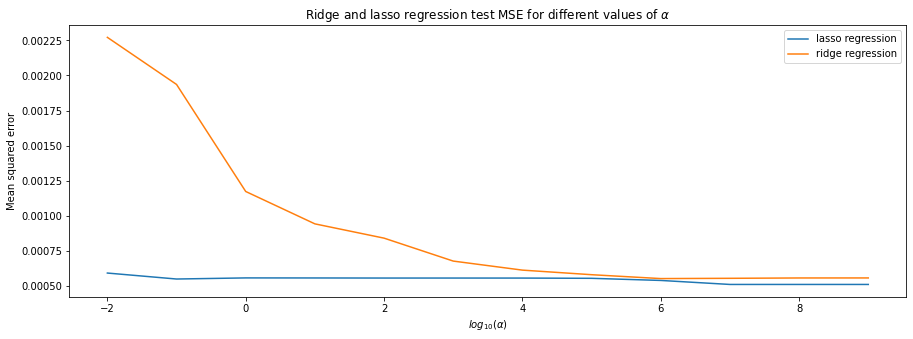

In [358]:

alphas = [1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9]
ridge_mses = calculate_mses(alphas, Ridge)

plt.figure(figsize = (15,5))
plt.plot(np.log10(alphas),lasso_mses, label=r"lasso regression")
plt.plot(np.log10(alphas), ridge_mses, label=r"ridge regression")
plt.xlabel(r"$log_{10}(\alpha)$")
plt.ylabel("Mean squared error")
plt.title(r'Ridge and lasso regression test MSE for different values of $\alpha$');
plt.legend();

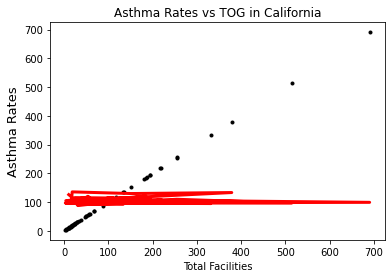

In [104]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

model=linear_model.LinearRegression()
X = combined[['CURRENT PREVALENCE']]
y = combined[['TOG']]
fit_all = model.fit(X, y)
y_prediction = fit_all.predict(X)
slope = fit_all.coef_[0]

plt.scatter(combined['TOG'], y, color='black', marker='.')
plt.plot(combined['TOG'], y_prediction, color='red', linewidth=3)

plt.title('Asthma Rates vs TOG in California')
plt.xlabel('Total Facilities')
plt.ylabel('Asthma Rates', fontsize=13)
plt.show()

In [ ]:
X = df[[]] # define an array of independent variables
y = df[[i_day]] # define an array (usually one-dimension) of target variables
lm_incidents = linear_model.LinearRegression() # initiate a linear regression object
fit_incidents = lm_incidents.fit(X,y) # fit the linear regression object to your X and y data